# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Data
This dataset was acquired from Kaggle. It has 23 features consisting of customer profile and credit card usage.

In [234]:
train = pd.read_csv('BankChurners.csv')

In [235]:
train.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Exploratary Data Analysis

# Data Cleaning and Preprocessing

Let’s first check whether our dataset has a duplicate or not. As we can see in the picture below, we don’t have any duplicates

<AxesSubplot:>

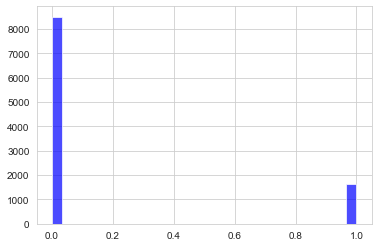

In [236]:
train["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"].hist(bins=30,color="blue",alpha=0.7)

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

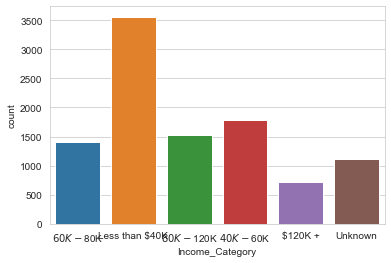

In [237]:
sns.countplot(x="Income_Category",data=train)

In [238]:
train.duplicated().sum()

0

In [239]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [240]:
train.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


<AxesSubplot:xlabel='Customer_Age', ylabel='count'>

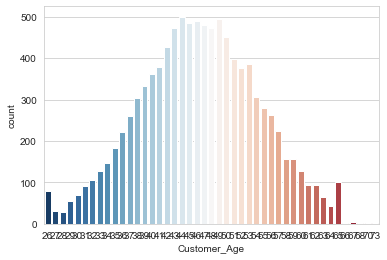

In [241]:
sns.set_style("whitegrid")
sns.countplot(x="Customer_Age",data=train,palette="RdBu_r")

<AxesSubplot:xlabel='Customer_Age', ylabel='count'>

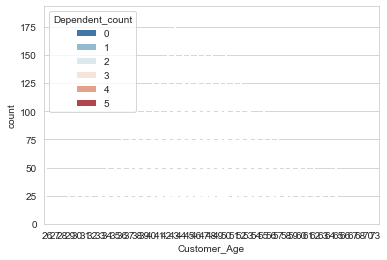

In [242]:
sns.set_style("whitegrid")
sns.countplot(x="Customer_Age",hue="Dependent_count",data=train,palette="RdBu_r")

<AxesSubplot:xlabel='Customer_Age', ylabel='count'>

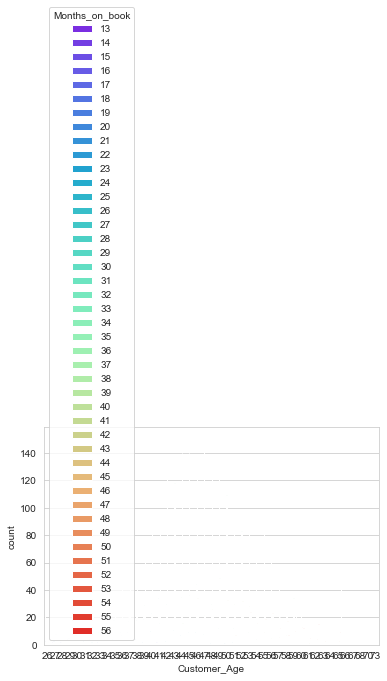

In [243]:
sns.set_style("whitegrid")
sns.countplot(x="Customer_Age",hue="Months_on_book",data=train,palette="rainbow")

C:\Users\Jainaba Ceesay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age'>

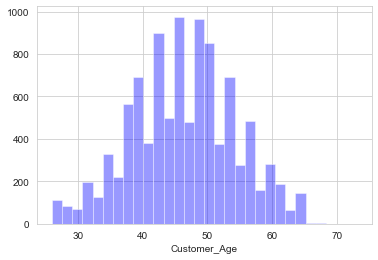

In [244]:
sns.distplot(train["Customer_Age"].dropna(),kde=False,color="blue",bins=30)

<AxesSubplot:>

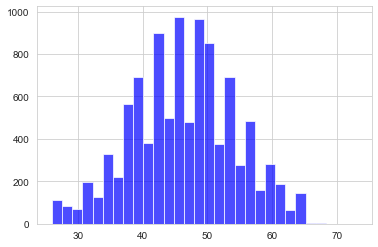

In [245]:
train["Customer_Age"].hist(bins=30,color="blue",alpha=0.7)

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

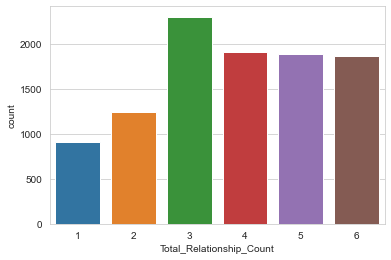

In [246]:
sns.countplot(x="Total_Relationship_Count",data=train)

<AxesSubplot:>

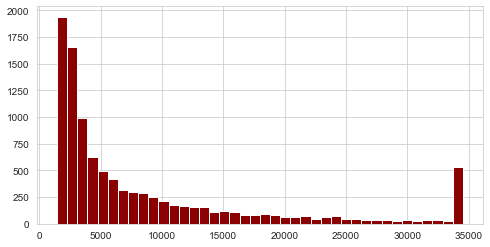

In [247]:
train["Credit_Limit"].hist(bins=40,color="darkred",figsize=(8,4))

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Dependent_count', ylabel='Customer_Age'>

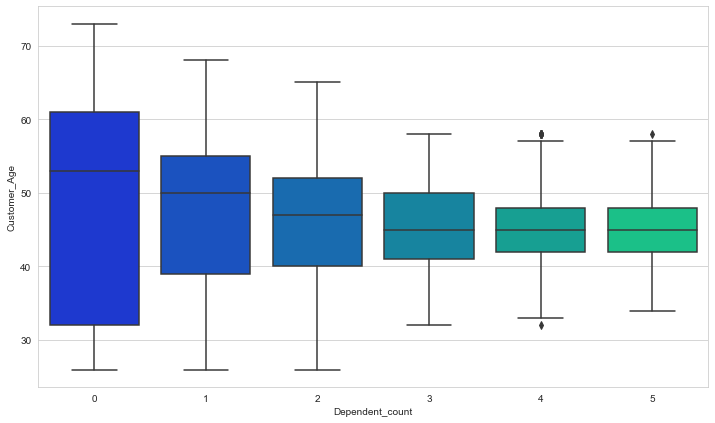

In [248]:
plt.figure(figsize=(12,7))
sns.boxplot(y="Customer_Age",x="Dependent_count",data=train,palette="winter")

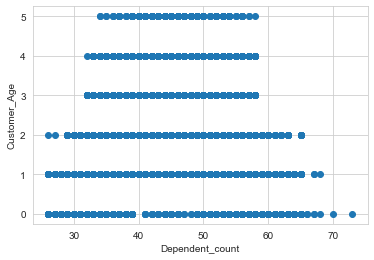

In [249]:
plt.scatter(train["Customer_Age"],train["Dependent_count"])
plt.xlabel("Dependent_count")
plt.ylabel("Customer_Age")
plt.show()

<AxesSubplot:>

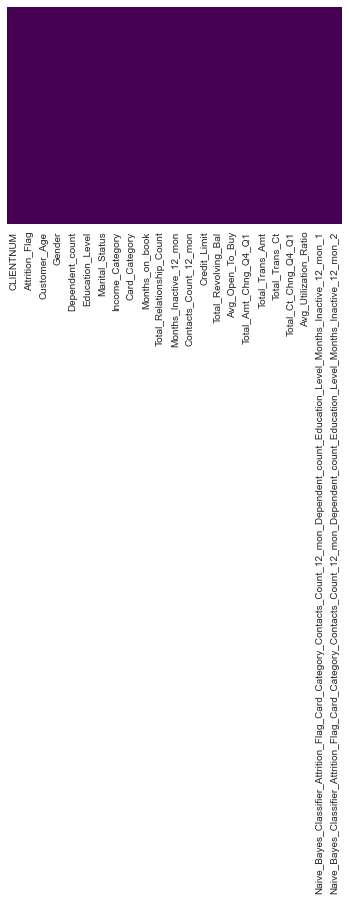

In [250]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [251]:
train.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)

In [252]:
train.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.99998


In [253]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Feature Engineering

After modelling I tried to find the most important features to predict customer attrition and according to 4 models (Decision Tree, Random Forest, XGBoost, and CatBoost) is Total_Trans_Ct or the number of transactions made in the 12 months

In [254]:
train.drop(["Attrition_Flag","Gender","Education_Level", "Marital_Status","Income_Category","Card_Category"],axis=1,inplace=True)

In [255]:
train = pd.concat([train,Gender,Income_Category],axis=1)

In [256]:
train.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,M,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,42,1.625,0.061,0.99991,1,0,1,0,0,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,33,3.714,0.105,0.99994,0,0,0,0,1,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,20,2.333,0.000,0.99998,1,0,0,1,0,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,20,2.333,0.760,0.99987,0,0,0,0,1,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,28,2.500,0.000,0.99998,1,0,1,0,0,0


Great! Our data is ready for our model!
# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).
# Train Test Split

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("Customer_Age",axis=1), 
                                                    train["Customer_Age"], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [259]:
from sklearn.linear_model import LogisticRegression

In [260]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [261]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

# Evaluation

We can check precision,recall,f1-score using classification report!

In [262]:
from sklearn.metrics import classification_report

In [263]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          26       0.00      0.00      0.00        24
          27       0.00      0.00      0.00         9
          28       0.00      0.00      0.00        12
          29       0.00      0.00      0.00        15
          30       0.00      0.00      0.00        26
          31       0.00      0.00      0.00        29
          32       0.00      0.00      0.00        33
          33       0.00      0.00      0.00        39
          34       0.00      0.00      0.00        53
          35       0.00      0.00      0.00        53
          36       0.00      0.00      0.00        64
          37       0.00      0.00      0.00        75
          38       0.00      0.00      0.00        95
          39       0.00      0.00      0.00       108
          40       0.00      0.00      0.00        95
          41       0.00      0.00      0.00       113
          42       0.00      0.00      0.00       148
          43       0.00    

C:\Users\Jainaba Ceesay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jainaba Ceesay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jainaba Ceesay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
